# Code

In [1]:
import os
import h5py
from PIL import Image
import operator

import matplotlib.pyplot as plt
import time, pickle, pandas

import numpy as np

import tensorflow.keras
from PIL import Image
import glob

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D ,Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers import Input
from keras.applications import VGG16
from keras import backend
from keras import optimizers
from tensorflow.keras import applications
from keras.utils.conv_utils import convert_kernel


%matplotlib inline

/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rtcl/Deep-fashion/Deep-fashion-venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rtcl/Deep-fashion/D

In [ ]:
import tensorflow as tf
config = tf.ConfigProto()

config.gpu_options.allow_growth = True

sess = tf.Session(config=config)

In [2]:

class_pattern = {
    0: 'Checked',
    1: 'Floral',
    2: 'Graphic',
    3: 'Plain',
    4: 'Striped'}
class_fabric = {
    0: 'Chiffon',
    1: 'Cotton',
    2: 'Crochet',
    3: 'Denim',
    4: 'Wool'}
class_color = {
    0: 'Black',
    1: 'Blue',
    2: 'Green',
    3: 'Red',
    4: 'White'}
class_style = {
    0: 'Casual',
    1: 'Formal',
    2: 'Party',
    3: 'Sports',
    4: 'Vacance'}

In [3]:
def show_sample(X):
    im = X
    plt.imshow(im)
    
    plt.axis('on')
    plt.show()

In [4]:
img_width, img_height = 150, 150

imagelist = []
# top_model_weights_path = 'bottleneck_fc_model.h5'
image_data_dir = 'Classification/fabric/test'
#chosenOnes = sorted(os.listdir(train_data_dir))
count = 0

test_datagen = ImageDataGenerator(rescale=1./255)

data1_generator = test_datagen.flow_from_directory(
        image_data_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode=None,
        shuffle = False)


Found 1293 images belonging to 5 classes.


In [5]:
# Reshaping the images array
nb_data_samples = 1293
c=0
images_valid=[]
for X_batch in data1_generator:
    c+=1
    if (c>nb_data_samples):
        break
    images_valid.append(X_batch[0,:,:,:])
    

data_images=np.asarray(images_valid)
print (data_images.shape)
np.save("last_resort.npy",np.asarray(imagelist,dtype=np.uint8))

(1293, 150, 150, 3)


In [15]:
pattern_model = load_model('./models/vgg_weights_best_pattern.hdf5')
fabric_model = load_model('./models/vgg_weights_best_fabric.hdf5')
color_model = load_model('./models/vgg_weights_best_color.hdf5')
style_model = load_model('./models/vgg_weights_best_style.hdf5')
# part_model = load_model('./models/vgg_weights_best_part.hdf5')

In [16]:
pattern=pattern_model.predict(data_images)
fabric=fabric_model.predict(data_images)
color=color_model.predict(data_images)
style=style_model.predict(data_images)
# part=part_model.predict(data_images)
print ("Pattern : " , pattern.shape)
print ("fabric : " , fabric.shape)
print ("color : " , color.shape)
print ("Style : " , style.shape) 
# print ("Part : " , part.shape)

Pattern :  (1293, 5)
fabric :  (1293, 5)
color :  (1293, 5)
Style :  (1293, 5)


Pattern :  Floral
Fabric :  Chiffon
Color :  Red
Style :  Casual


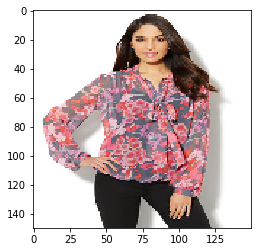

---------------------------------------------
Pattern :  Plain
Fabric :  Crochet
Color :  White
Style :  Sports


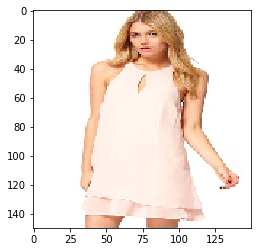

---------------------------------------------
Pattern :  Floral
Fabric :  Crochet
Color :  Red
Style :  Party


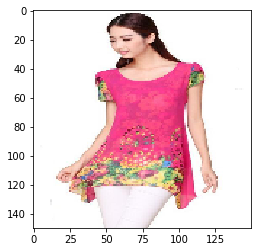

---------------------------------------------
Pattern :  Floral
Fabric :  Chiffon
Color :  Blue
Style :  Vacance


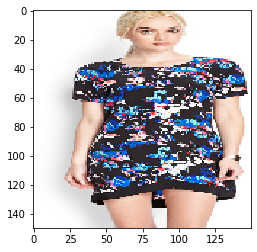

---------------------------------------------
Pattern :  Floral
Fabric :  Chiffon
Color :  Blue
Style :  Vacance


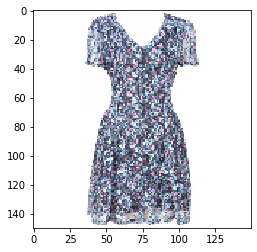

---------------------------------------------


In [21]:
for i in range(20,25):
    
    #show_sample(data_images[i])
    print ("Pattern : " , class_pattern[np.argmax(pattern[i])])
    print ("Fabric : " , class_fabric[np.argmax(fabric[i])])
    print ("Color : " , class_color[np.argmax(color[i])])
    print ("Style : " , class_style[np.argmax(style[i])])
#     print ("Part : " , class_part[np.argmax(part[i])])
    show_sample(data_images[i])
    print ("---------------------------------------------")

In [22]:
feature_list=[]
for i in range(len(data_images)):
    vals=np.zeros(4)
    vals[0] = np.argmax(pattern[i])
    vals[1] = np.argmax(fabric[i])
    vals[2] = np.argmax(color[i])
    vals[3] = np.argmax(style[i])
#     vals[4] = np.argmax(part[i])
    feature_list.append(vals)
    
print (feature_list[3])
feature_data = np.asarray(feature_list)
print (feature_data.shape)
np.save("db_images.npy",data_images)
np.save("db_features.npy",feature_data)

[1. 4. 1. 0.]
(1293, 4)
